# Avocado Prices

The [data docs](https://www.kaggle.com/neuromusic/avocado-prices) provide some information on the source of the dataset and information regarding the attributes.

In [18]:
import pandas as pd
import seaborn as sns
import os
from data import load_dataset
import plotter

## Preliminary Analysis

In [19]:
avocado = load_dataset("avocado")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Let's drop the column containing the unique `ids` (pandas does that for us) and rename the columns for simplicity.

In [20]:
avocado = avocado.drop("Unnamed: 0", axis="columns")
avocado = avocado.rename(mapper={"AveragePrice": "Averate Price"}, axis="columns")
avocado.columns = avocado.columns.str.lower().str.replace(" ", "_")
avocado.columns

Index(['date', 'averate_price', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

In [21]:
avocado.shape

(18249, 13)

In [22]:
avocado.dtypes

date              object
averate_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
region            object
dtype: object

`date` should be converted to `datetime` dtype and `type` and `region` should be `category` dtype. `total_column`, `4046`, `4225`, `4770`, `total_bags`, `small_bags`, and `xlarge_bags` are floats but represent an absolute value (number of bags and avocados sold), they should be rounded and converted to int type.

### Handling datetime features

In [23]:
avocado["date"] = pd.to_datetime(avocado["date"].str.strip())
avocado["date"].dtype

dtype('<M8[ns]')

### Handling categorical features

In [24]:
categorical_features = [
    "type",
    "region"
]
avocado[categorical_features] = avocado[categorical_features].apply(
    lambda col: col.str.strip().astype("category")
)
avocado[categorical_features].dtypes

type      category
region    category
dtype: object

### Handing numerical features

In [25]:
numerical_features = [
    "total_volume",
    "4046",
    "4225",
    "4770",
    "total_bags",
    "small_bags",
    "large_bags",
    "xlarge_bags"
]

avocado[numerical_features] = avocado[numerical_features].apply(
    lambda col: col.astype("int")
)
avocado[numerical_features].dtypes

total_volume    int64
4046            int64
4225            int64
4770            int64
total_bags      int64
small_bags      int64
large_bags      int64
xlarge_bags     int64
dtype: object

### Descriptive statistics, missing & duplicates

In [26]:
avocado.describe(include="all")

,date,averate_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,2016-08-13 23:30:43.498273792,1.405978,8.506435e+05,2.930079e+05,2.951541e+05,2.283940e+04,2.396387e+05,1.821942e+05,5.433767e+04,3106.279029,NaN,2016.147899,NaN
min,2015-01-04 00:00:00,0.440000,8.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,2015-10-25 00:00:00,1.100000,1.083800e+04,8.540000e+02,3.008000e+03,0.000000e+00,5.088000e+03,2.849000e+03,1.270000e+02,0.000000,NaN,2015.000000,NaN
50%,2016-08-14 00:00:00,1.370000,1.073760e+05,8.645000e+03,2.906100e+04,1.840000e+02,3.974300e+04,2.636200e+04,2.647000e+03,0.000000,NaN,2016.000000,NaN
75%,2017-06-04 00:00:00,1.660000,4.329620e+05,1.110200e+05,1.502060e+05,6.243000e+03,1.107830e+05,8.333700e+04,2.202900e+04,132.000000,NaN,2017.000000,NaN
max,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719096e+06,551693.000000,NaN,2018.000000,NaN


In [27]:
avocado.isna().any()

date             False
averate_price    False
total_volume     False
4046             False
4225             False
4770             False
total_bags       False
small_bags       False
large_bags       False
xlarge_bags      False
type             False
year             False
region           False
dtype: bool

In [28]:
avocado[avocado.duplicated()].shape

(0, 13)

### Correlations

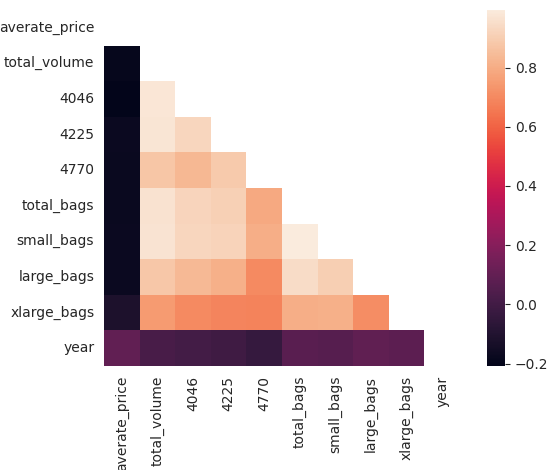

In [29]:
plotter.corr(avocado.corr(numeric_only=True))

The numerical features are positively correlated to one another.